In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from memote import ReportConfiguration
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [3]:
%matplotlib inline

## Extract

In [4]:
df = pd.concat([
    pd.read_csv("data/bigg/metrics.csv"),
    pd.read_csv("data/uminho/metrics.csv"),
#     pd.read_csv("data/mmodel/sbml/metrics.csv"),
    pd.read_csv("data/mmodel/sbml3/metrics.csv"),
    pd.read_csv("data/AGORA/metrics.csv"),
    pd.read_csv("data/embl_gems/metrics.csv"),
    pd.read_csv("data/BioModels_Database-r27_p2m-whole_genome_metabolism/metrics.csv"),
], ignore_index=True)

In [5]:
df.shape

(1153315, 7)

In [6]:
df.head()

,test,title,section,metric,numeric,model,collection
0,test_absolute_extreme_coefficient_ratio,Ratio Min/Max Non-Zero Coefficients,matrix,0.0,NaN,iE2348C_1286,BiGG
1,test_biomass_consistency,Biomass Consistency,test_biomass,1.0,0.999658,iE2348C_1286,BiGG
2,test_biomass_consistency,Biomass Consistency,test_biomass,1.0,0.999994,iE2348C_1286,BiGG
3,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,1.0,0.000000,iE2348C_1286,BiGG
4,test_biomass_default_production,Biomass Production In Default Medium,test_biomass,1.0,0.982478,iE2348C_1286,BiGG


## Transform

### Restrict to Scored Test Cases

In [4]:
config = ReportConfiguration.load()

In [5]:
scored = set()
for name, section in config["cards"]["scored"]["sections"].items():
    scored.update(section["cases"])

In [6]:
df = pd.DataFrame({"test": sorted(scored)})

In [8]:
df.to_csv("scored_tests.csv", index=False, header=True)

In [9]:
scored_df = df[df["test"].isin(scored)].copy()

In [10]:
scored_df.shape

(189441, 7)

### Pivot Table

In [11]:
scored_df.set_index(["collection", "model", "test"], inplace=True)

In [12]:
scored_df[scored_df.index.duplicated(keep=False)].sort_index()

,,,title,section,metric,numeric
collection,model,test,,,,


In [13]:
observations = scored_df.loc[:, ["metric"]].unstack()
observations.head()

metric  \
test                                             test_biomass_specific_sbo_presence   
collection model                                                                      
AGORA      Abiotrophia_defectiva_ATCC_49176                                     1.0   
           Achromobacter_xylosoxidans_A8                                        1.0   
           Achromobacter_xylosoxidans_NBRC_15126                                1.0   
           Acidaminococcus_fermentans_DSM_20731                                 1.0   
           Acidaminococcus_intestini_RyC_MR95                                   1.0   

                                                                                    \
test                                             test_demand_specific_sbo_presence   
collection model                                                                     
AGORA      Abiotrophia_defectiva_ATCC_49176                                    1.0   
           Achromobacter_xylosoxidans_A8                                       1.0   
           Achromobacter_xylosoxidans_NBRC_15126                               1.0   
           Acidaminococcus_fermentans_DSM_20731                                1.0   
           Acidaminococcus_intestini_RyC_MR95                                  1.0   

                                                                                      \
test                                             test_exchange_specific_sbo_presence   
collection model                                                                       
AGORA      Abiotrophia_defectiva_ATCC_49176                                      1.0   
           Achromobacter_xylosoxidans_A8                                         1.0   
           Achromobacter_xylosoxidans_NBRC_15126                                 1.0   
           Acidaminococcus_fermentans_DSM_20731                                  1.0   
           Acidaminococcus_intestini_RyC_MR95                                    1.0   

                                                                         \
test                                             test_find_disconnected   
collection model                                                          
AGORA      Abiotrophia_defectiva_ATCC_49176                         0.0   
           Achromobacter_xylosoxidans_A8                            0.0   
           Achromobacter_xylosoxidans_NBRC_15126                    0.0   
           Acidaminococcus_fermentans_DSM_20731                     0.0   
           Acidaminococcus_intestini_RyC_MR95                       0.0   

                                                                                                       \
test                                             test_find_reactions_unbounded_flux_default_condition   
collection model                                                                                        
AGORA      Abiotrophia_defectiva_ATCC_49176                                                0.210425     
           Achromobacter_xylosoxidans_A8                                                   0.243609     
           Achromobacter_xylosoxidans_NBRC_15126                                           0.258824     
           Acidaminococcus_fermentans_DSM_20731                                            0.274823     
           Acidaminococcus_intestini_RyC_MR95                                              0.143110     

                                                                                        \
test                                             test_gene_product_annotation_presence   
collection model                                                                         
AGORA      Abiotrophia_defectiva_ATCC_49176                                        1.0   
           Achromobacter_xylosoxidans_A8                                           1.0   
           Achromobacter_xylosoxidans_NBRC_15126                                   1.0   
    

## Dimension Reduction

In [14]:
plt.rcParams['figure.figsize'] = 16, 9

### PCA

In [15]:
%%time
pca = PCA(n_components=2).fit_transform(observations)

CPU times: user 145 ms, sys: 280 ms, total: 425 ms
Wall time: 63.8 ms


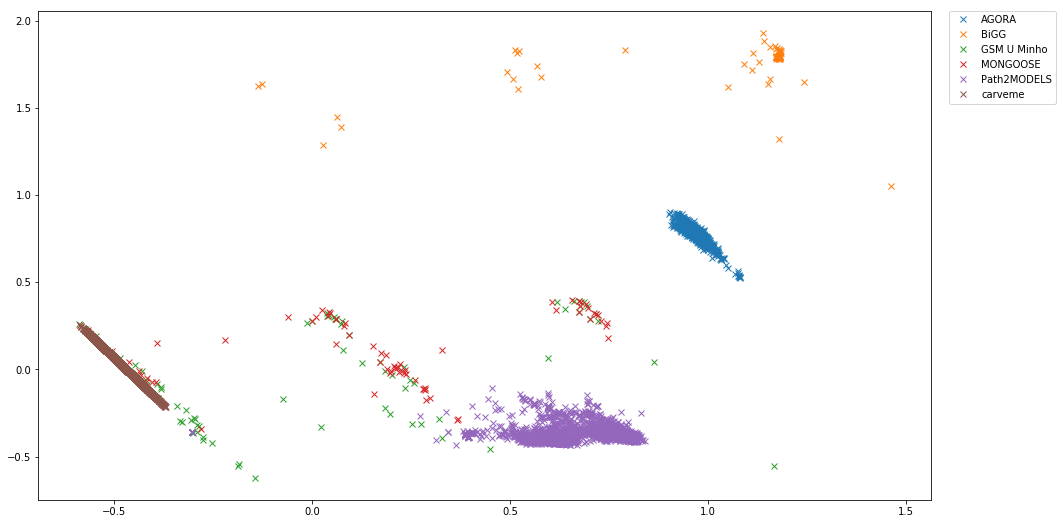

In [16]:
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    plt.plot(pca[mask, 0], pca[mask, 1], "x", label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### t-SNE

In [17]:
%%time
tsne = TSNE(n_components=2).fit_transform(observations)

CPU times: user 51.9 s, sys: 16 ms, total: 51.9 s
Wall time: 51.9 s


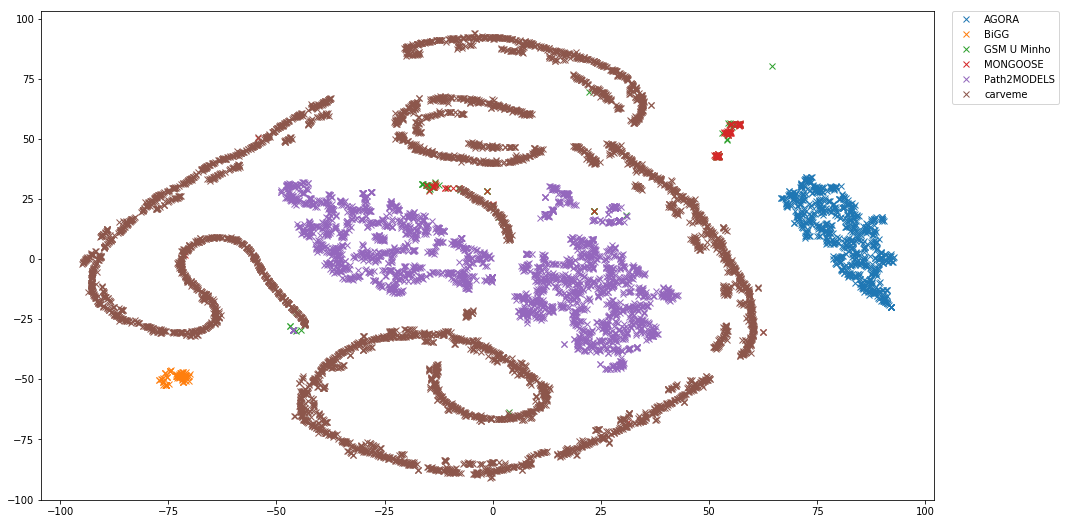

In [18]:
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    plt.plot(tsne[mask, 0], tsne[mask, 1], "x", label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()

### UMAP

In [19]:
%%time
umap = UMAP(n_components=2).fit_transform(observations)

/home/moritz/.virtualenvs/memote-meta/lib/python3.6/site-packages/umap/spectral.py:229 UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)


CPU times: user 31.5 s, sys: 7.01 s, total: 38.5 s
Wall time: 27.7 s


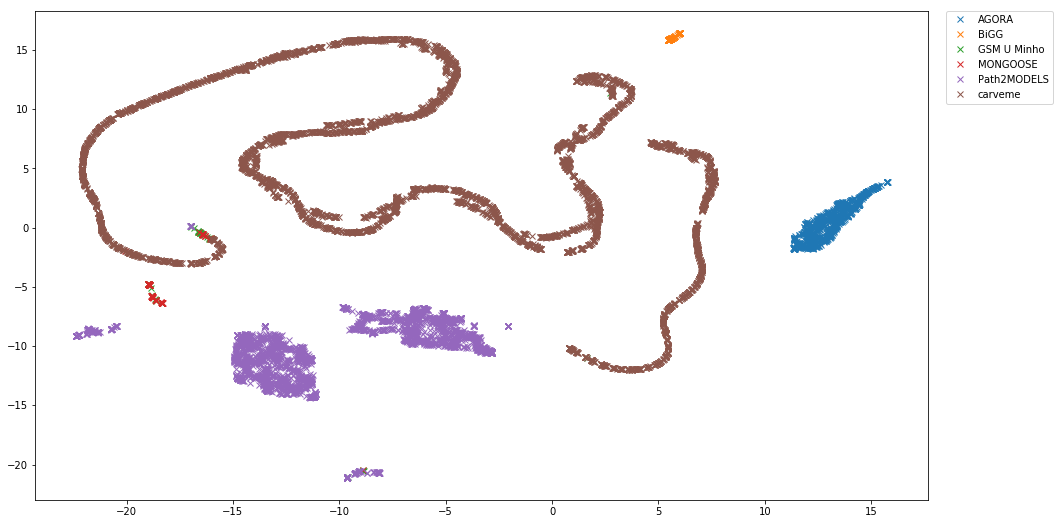

In [20]:
for label in observations.index.get_level_values("collection").unique():
    mask = observations.index.get_level_values("collection") == label
    plt.plot(umap[mask, 0], umap[mask, 1], "x", label=label)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
plt.show()